In [86]:
from newsapi import NewsApiClient
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns





newsapi = NewsApiClient(api_key='09d51f51809347958df106f78bd70a41')

News_article = newsapi.get_everything(q='Technology', sources="bbc-news", page_size=100, sort_by="publishedAt", language="en")["articles"]


In [87]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
News_sentiment_results = []

for article in News_article:
    if article["description"] == None:
        continue
    pol_score = sia.polarity_scores(article["description"])
    pol_score['headline'] = article["description"]
    News_sentiment_results.append(pol_score)

    


In [88]:
News_df = pd.DataFrame.from_records(News_sentiment_results)


In [89]:
News_df['label'] = 0
News_df.loc[News_df['compound'] > 0.3, 'label'] = 1
News_df.loc[News_df['compound'] < -0.3, 'label'] = -1

News_df = News_df[['headline', 'label']]

In [91]:
#labels 0 == neutral , -1 == negative , 1 == Positive
print(News_df.head(25))

                                             headline  label
0   This document is intended to serve as the basi...      0
1   Liverpool manager Jurgen Klopp believes the la...     -1
2   The Brutalist building's nerve centre has been...      1
3   From the latest in electric aircraft to the sa...      0
4   An English town could be the first to turn off...     -1
5   In Swedish Lapland herders say their animals a...      0
6   Ukraine's President Volodymyr Zelensky is meet...      1
7   Rugby league legend Rob Burrow is honoured wit...      1
8   The paper says its IT network is being affecte...      0
9   The home secretary told a committee of peers t...      0
10  We look at the runner and riders to take over ...      0
11  The billionaire says he will change the policy...      0
12  The bank is has been fined for an IT meltdown ...      0
13  An experimental treatment saves the life of ba...     -1
14  Rejecting deliveries to the doorstep, some dro...     -1
15  The PM kicks off a t

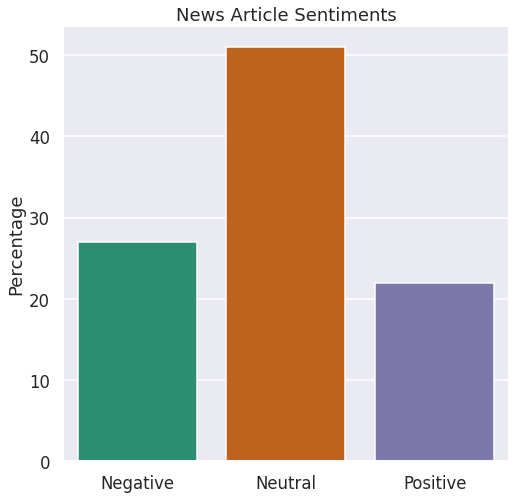

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

counts = News_df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
ax.set_title('News Article Sentiments')

plt.show()

In [93]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
stop_words = stop_words + ["to", "new", "news", "said", "part", "gave","mr","from","us","a", "one", "is", "li", "says","in","president"]

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

In [94]:
from matplotlib import rcParams
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

stopwords = STOPWORDS

def makeWordCloud(freqs, title):
    rcParams['figure.figsize'] = 10, 20
    wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=25, width=800, height=400).generate_from_frequencies(freqs)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    


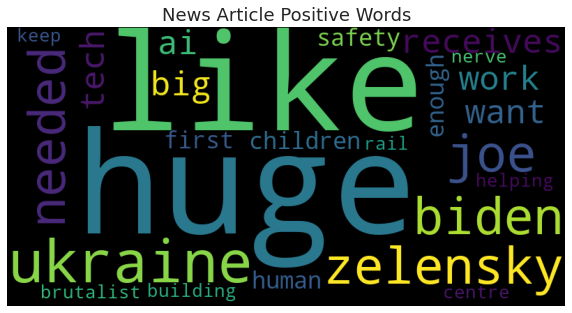

In [95]:
pos_lines = list(News_df[News_df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

word_freq = dict(pos_freq.most_common(40))

makeWordCloud(word_freq, "News Article Positive Words")


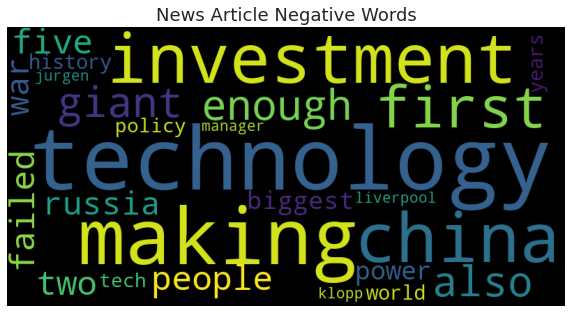

In [96]:
neg_lines = list(News_df[News_df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

word_freq = dict(neg_freq.most_common(30))

makeWordCloud(word_freq, "News Article Negative Words")
